In [40]:
!pip install scikit-learn pandas numpy
!pip install -U spacy
!python -m spacy download en
!pip uninstall -y torch torchvision torchaudio
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cpu
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.1/29.1 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 73.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Successfully uninstalled spacy-3.7.5
⚠ As of spaCy 

In [10]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
import spacy


Caricare il dataset e unirlo


In [5]:
from google.colab import files

# Carica i file manualmente
uploaded = files.upload()  # Seleziona i file file1.ann e file2.ann dalla tua scrivania


Saving file2.ann to file2.ann
Saving file1.ann to file1.ann


In [3]:
import csv

# Funzione per convertire un file .ann in .csv
def convert_ann_to_csv(input_file, output_file):
    data = []
    with open(input_file, 'r', encoding='utf-8') as f:
        for line in f:
            if line.strip():  # Controlla che la riga non sia vuota
                id, start, end, label = line.strip().split('\t')
                data.append([id, int(start), int(end), label])
            else:
                data.append([])

    # Scrivi il file CSV
    with open(output_file, 'w', encoding='utf-8', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['id', 'Start', 'End', 'Label'])  # Intestazioni
        writer.writerows(data)

# Converti i file caricati
convert_ann_to_csv('file1.ann', 'file1.csv')
convert_ann_to_csv('file2.ann', 'file2.csv')
print("Conversione completata! I file CSV sono stati generati.")


Conversione completata! I file CSV sono stati generati.


In [4]:
import pandas as pd

# Carica i file CSV in DataFrame
df1 = pd.read_csv('file1.csv')
df2 = pd.read_csv('file2.csv')

# Unisci i DataFrame
ds = pd.concat([df1, df2], ignore_index=True)

# Mostra un'anteprima del dataset unito
print(ds.head())

# Salva il dataset unito come CSV
ds.to_csv('merged_dataset.csv', index=False)
print("Dataset unito salvato come 'merged_dataset.csv'")



             id  Start  End                     Label
0   Ventricular      0   11  B-Multi-tissue_structure
1  fibrillation     12   24                         O
2           due     25   28                         O
3            to     29   31                         O
4          long     32   36                         O
Dataset unito salvato come 'merged_dataset.csv'


# DEA

# CHECK FOR MISSING VALUES

In [5]:
len(ds)

117636

In [6]:
# Check for the existence of NaN values in a cell:
ds.isnull().sum()

,0
id,18
Start,0
End,0
Label,0


# CLASSIFICATION LABLES FREQUENCY





As the first step of the exploratory analysis, we printed all the named entity recognition (NER) tags along with their frequencies in the biomedical papers under analysis.


In [7]:
ds['Label'].unique()

array(['B-Multi-tissue_structure', 'O', 'B-Organism_substance',
       'B-Organism_subdivision', 'B-Organ', 'I-Multi-tissue_structure',
       'B-Cellular_component', 'I-Cellular_component', 'B-Cell', 'I-Cell',
       'B-Immaterial_anatomical_entity', 'B-Tissue', 'I-Tissue',
       'B-Pathological_formation', 'B-Anatomical_system',
       'I-Organism_substance', 'I-Anatomical_system',
       'I-Pathological_formation', 'I-Immaterial_anatomical_entity',
       'I-Organ', 'I-Organism_subdivision',
       'B-Developing_anatomical_structure',
       'I-Developing_anatomical_structure'], dtype=object)

In [ ]:

ds['Label'].value_counts()


,count
Label,
O,112952
B-Cell,776
B-Multi-tissue_structure,639
I-Cell,543
B-Organ,381
I-Multi-tissue_structure,372
B-Pathological_formation,368
B-Organism_substance,291
I-Pathological_formation,248


In [ ]:
count_O = ds['Label'].value_counts().get('O',0)
print(count_O)
O_frequency = (count_O / len(ds)) *100
print(O_frequency)

112952
96.01822571321705



In the following, we performed a mapping of the NER tags by grouping the labels of the same class, marked with either I or B, into a single representative label for each class. This was done to provide a clearer representation of the frequency with which each class appears in the text.

For the purpose of creating an explanatory graphical representation of the frequency, I excluded the Outside (O) NER tags from the mapping. This decision was made because, as observed in the output of the counts, there is a significant imbalance, with O accounting for 112,952 occurrences, representing 96% of the total NER tags.

In [16]:
# mapping lables

mapping = {'B-Multi-tissue_structure': 'Multi-tissue_structure',
           'I-Multi-tissue_structure': 'Multi-tissue_structure',
           'B-Organism_substance':'Organism_substance',
           'I-Organism_substance':'Organism_substance',
           'B-Organism_subdivision':'Organism_subdivision',
           'I-Organism_subdivision':'Organism_subdivision',
           'B-Organ':'Organ',
           'I-Organ':'Organ',
           'B-Cellular_component':'Cellular_component',
           'I-Cellular_component':'Cellular_component',
           'B-Cell':'Cell',
           'I-Cell':'Cell',
           'B-Immaterial_anatomical_entity':'Immaterial_anatomical_entity',
           'I-Immaterial_anatomical_entity':'Immaterial_anatomical_entity',
           'B-Tissue':'Tissue',
           'I-Tissue':'Tissue',
           'B-Pathological_formation':'Pathological_formation',
           'I-Pathological_formation':'Pathological_formation',
           'B-Anatomical_system':'Anatomical_system',
           'I-Anatomical_system':'Anatomical_system',
           'B-Developing_anatomical_structure':'Developing_anatomical_structure',
           'I-Developing_anatomical_structure':'Developing_anatomical_structure'

}

In [17]:
ds['Label'] = ds['Label'].map(mapping)

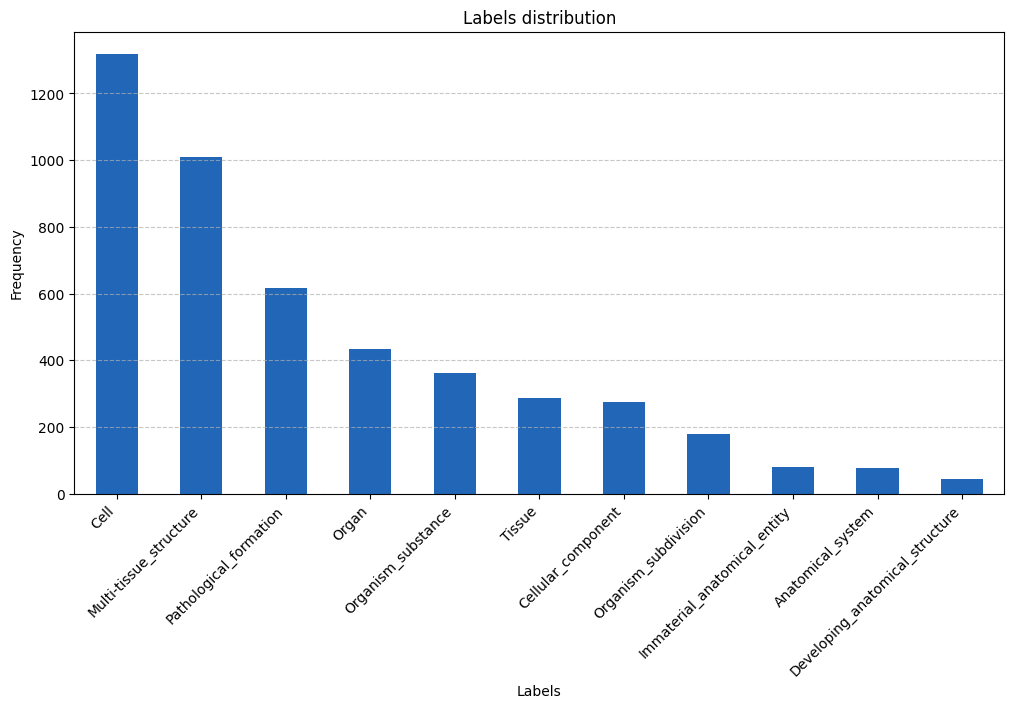

In [ ]:
label_counts = ds['Label'].value_counts()

plt.figure(figsize=(12, 6))
label_counts.plot(kind='bar', color='#2166b7')
plt.title('Labels distribution')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Ruota le etichette per leggibilità
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# MOST FREQUENT TOKENS


Using the RegexpTokenizer(r'\w+') from NLTK, which employs the regular expression \w+ to extract alphanumeric sequences, we removed delimiters such as punctuation and other undesired symbols. This step was taken to focus the subsequent analysis on identifying semantic patterns and examining token frequency by class.

Following this, we leveraged spaCy to remove default stop words provided by the library. Since stop words often dominate token frequency counts, their removal aligns with the rationale behind eliminating delimiters: to ensure that the analysis emphasizes meaningful and semantically relevant tokens.

In [11]:

tokenizer = RegexpTokenizer(r'\w+')

ds['id'] = ds['id'].apply(lambda x: ' '.join(tokenizer.tokenize(str(x))))

In [13]:

nlp = spacy.load("en_core_web_sm")
print(nlp.Defaults.stop_words)

{'after', 'for', 'neither', 'yourselves', 'third', '‘s', 'again', 'just', 'already', 'move', 'fifteen', 'these', 'becomes', 'used', 'still', 'nobody', 'back', 'some', 'no', 'somehow', 'hundred', 'so', 'within', 'ca', 'beside', 'over', 'something', 'latter', 'top', 'are', 'n’t', 'more', 'cannot', 'against', 'must', 'if', 'name', 'except', 'which', 'bottom', 'whence', 'well', 'all', '’d', 'it', 'seems', 'take', 'until', 'they', 'been', 'among', 'put', 'much', 'others', 'she', 'onto', 'his', 'between', 'none', 'how', 'hereupon', 'you', 'part', 'former', 'up', 'this', 'via', 'towards', 'him', '’re', 'twenty', 'or', 'them', 'will', 'what', 'whereafter', 'however', 'yourself', 'amount', 'five', 'show', 'we', 'make', 'ours', 'be', 'an', 'unless', 'too', 'than', 'once', 'under', 'thru', 'not', 'further', 'is', 'else', 'moreover', 'and', 'yet', 'each', 'of', 'every', 'due', 'eleven', 'your', 'many', 'themselves', "n't", 'me', 'namely', 'ten', 'someone', 'would', 'mostly', 'please', 'somewhere',

In [14]:
def remove_stop_words(text):
    doc = nlp(text)
    return ' '.join([token.text for token in doc if not token.is_stop])

ds['id'] = ds['id'].apply(remove_stop_words)

In [15]:
most_common_tokens = ds['id'].value_counts().head(10)
print(most_common_tokens)

id
            56561
1             551
0             499
5             404
2             400
patients      323
3             301
4             236
cells         236
6             195
Name: count, dtype: int64


In [18]:
# Conta i token più frequenti per ciascuna classe
most_common_tokens_per_class = (
    ds.groupby('Label')['id']
    .value_counts()  # Conta i token per classe
    .groupby(level=0)  # Raggruppa di nuovo per classe
    .head(5)  # Prendi i primi 5 token per classe
)

# Trasformo il risultato in un DataFrame per facilità di visualizzazione
most_common_tokens_df = most_common_tokens_per_class.reset_index(name='Frequency')

# Visualizza il risultato
print(most_common_tokens_df)


                              Label             id  Frequency
0                 Anatomical_system         system         16
1                 Anatomical_system    respiratory          9
2                 Anatomical_system  corticospinal          7
3                 Anatomical_system        nervous          7
4                 Anatomical_system   neurological          7
5                              Cell          cells        234
6                              Cell           cell        151
7                              Cell                       105
8                              Cell             NK         93
9                              Cell             DC         41
10               Cellular_component       membrane         29
11               Cellular_component         growth         23
12               Cellular_component           cone         21
13               Cellular_component  mitochondrial         21
14               Cellular_component        surface         10
15  Deve

In [19]:

import matplotlib.pyplot as plt

for label in most_common_tokens_df['Label'].unique():
    class_tokens = most_common_tokens_df[most_common_tokens_df['Label'] == label]

    # Crea un grafico a torta
    plt.figure(figsize=(6, 6))
    plt.pie(class_tokens['Frequency'], labels=class_tokens['id'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Token Distribution for Class: {label}')
    plt.show()



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ke

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

# TOKEN LENGTH DISTRIBUTION